<a href="https://colab.research.google.com/github/SoheliPaul/Computer-Vision/blob/main/CVLab4_561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

average filter (Noise filtering)

gaussian blur

sharpening filter (laplacian)

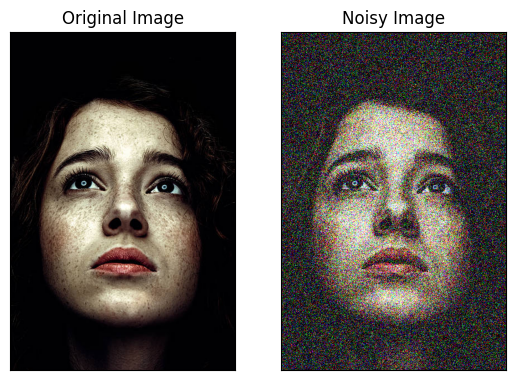

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image_path = '/content/cvimg11.jpg'
original_image = cv2.imread(image_path)

# Function to add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, sigma=150):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(original_image)

# Display the original and noisy images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

plt.show()

**USER-DEFINED METHOD**

---



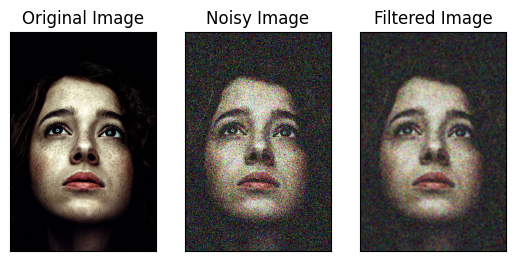

In [2]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('image.jpg', 0)
output_img = np.zeros_like(img)

# Define a 3x3 averaging filter kernel
kernel = np.ones((3, 3)) / 9

# Apply spatial domain averaging filter
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        output_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

# Display the filtered image
cv2.imshow('Filtered Image', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**BUILT-IN**

---



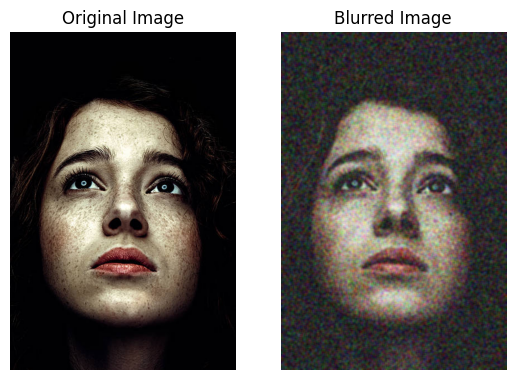

In [3]:
# Apply an average filter with a 5x5 kernel
filter_size = 5
kernel = np.ones((filter_size, filter_size), np.float32) / (filter_size * filter_size)
blurred_img = cv2.filter2D(noisy_image, -1, kernel)
plt.figure(figsize=(12, 6))
# Display the original and blurred images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()


**BUILT-IN**

---



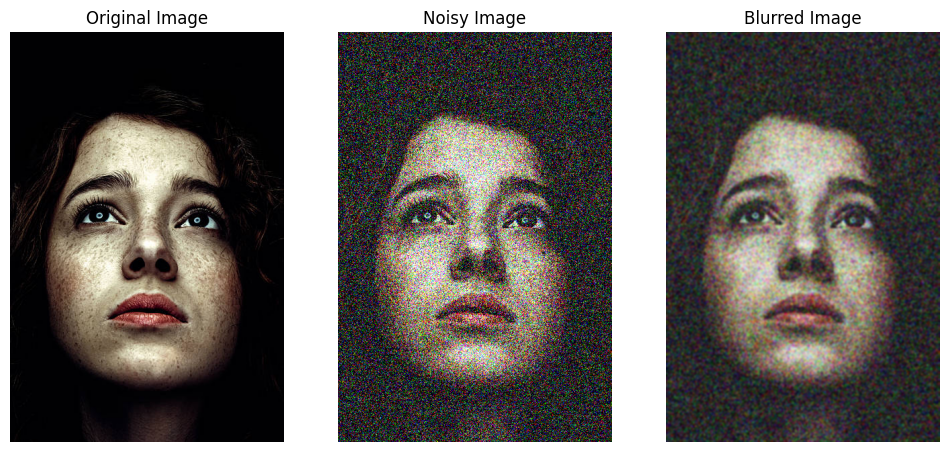

In [8]:
import matplotlib.pyplot as plt
# Apply Gaussian blur with a kernel size of (7, 7) and standard deviation of 0 in both directions
gausblur_image = cv2.GaussianBlur(noisy_image, (7, 7), 0)

# Display the images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gausblur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()


**USER-DEFINED METHOD**

---



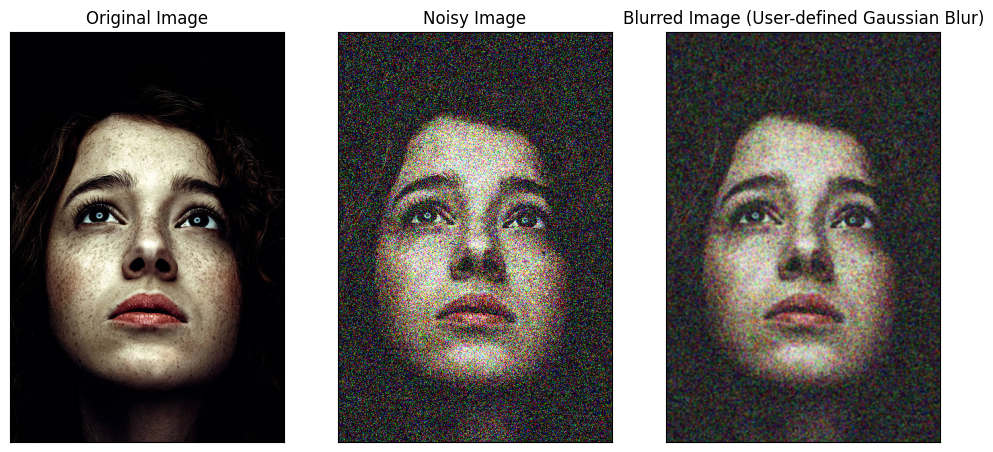

In [10]:
# Function to apply Gaussian blur using a user-defined method
def apply_gaussian_blur_user_defined(image, kernel_size=(5, 5), sigma=1.0):
    # Create a Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply the filter using convolution
    blurred_image = cv2.filter2D(image, -1, kernel)

    return blurred_image

def gaussian_kernel(kernel_size, sigma):
    kernel_size = int(kernel_size[0] // 2 * 2 + 1), int(kernel_size[1] // 2 * 2 + 1)
    x, y = np.mgrid[-kernel_size[0]//2 + 1: kernel_size[0]//2 + 1, -kernel_size[1]//2 + 1: kernel_size[1]//2 + 1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

# Apply Gaussian blur using the user-defined method
blurred_image_user_defined = apply_gaussian_blur_user_defined(noisy_image, kernel_size=(5, 5), sigma=1.0)
plt.figure(figsize=(12, 6))
# Display the original, noisy, and blurred images
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(blurred_image_user_defined, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image (User-defined Gaussian Blur)'), plt.xticks([]), plt.yticks([])

plt.show()


**BUILT-IN**

---



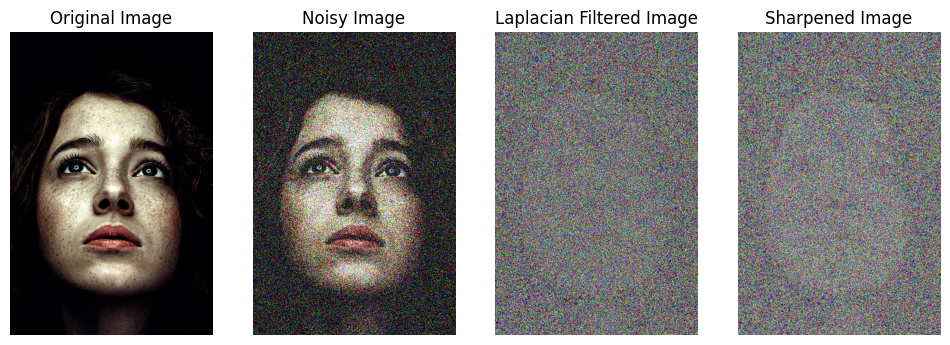

In [15]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(noisy_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))  # Convert to 8-bit unsigned integer

# Display the original, Laplacian filtered, and sharpened images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Laplacian Filtered Image')
plt.axis('off')

sharpened_image = np.uint8(np.clip(noisy_image + laplacian, 0, 255))  # Combine original and Laplacian filtered image

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


**USER-DEFINED METHOD**

---



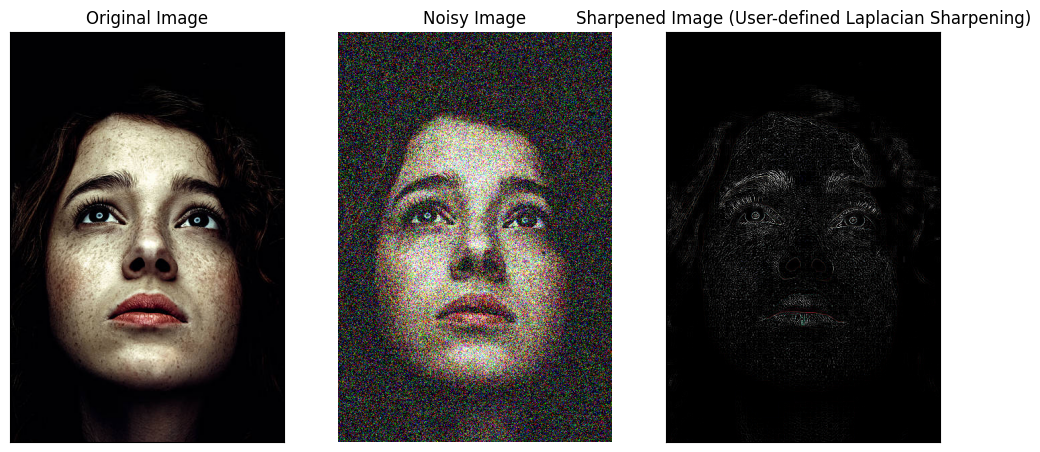

In [18]:
# Function to apply Laplacian filter for sharpening using a user-defined method
def apply_laplacian_sharpening_user_defined(image, kernel_size=(3, 3)):
    # Create a Laplacian kernel
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], dtype=np.float32)

    # Apply the filter using convolution
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

# Apply Laplacian filter for sharpening using the user-defined method
sharpened_image_user_defined = apply_laplacian_sharpening_user_defined(original_image)

# Display the original and sharpened images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(sharpened_image_user_defined, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image (User-defined Laplacian Sharpening)'), plt.xticks([]), plt.yticks([])

plt.show()
